# Data visualization

In [1]:
import sys
sys.path.append('..')
from core.dataset import DataHandler

import matplotlib.pyplot as plt

In [2]:
input_files = ['../../data/0720/its_PIDStudy.root']
cfg_data_file = '../config/config_data.yml'

features = [ 'clSizeL0',
 'clSizeL1',
 'clSizeL2',
 'clSizeL3',
 'clSizeL4',
 'clSizeL5',
 'clSizeL6']
dataset = DataHandler(input_files, cfg_data_file)

Loading configuration file: ../config/config_data.yml
Loading data from: ../../data/0720/its_PIDStudy.root


In [3]:
dataset.dataset.columns

['sign',
 'p',
 'pt',
 'pTPC',
 'pITS',
 'eta',
 'phi',
 'tgL',
 'chi2ITS',
 'chi2TPC',
 'chi2ITSTPC',
 'dEdx',
 'nClusTPC',
 'nSigmaDeu',
 'nSigmaP',
 'nSigmaK',
 'nSigmaPi',
 'nSigmaE',
 'clSizeL0',
 'clSizeL1',
 'clSizeL2',
 'clSizeL3',
 'clSizeL4',
 'clSizeL5',
 'clSizeL6',
 'cosL',
 'meanClSize',
 'clSizeCosL',
 'nSigmaAbsDeu',
 'nSigmaAbsP',
 'nSigmaAbsK',
 'nSigmaAbsPi',
 'nSigmaAbsE',
 'deltaP',
 'partPDG',
 'partID',
 'mass',
 'beta']

In [6]:
dataset.dataset['partID'].unique()

dataset.dataset[dataset.target].unique()

partID
f64
0.0
1.0
2.0


In [4]:
print(dataset[2])
print(dataset.dataset[features + ['beta']][2])

print(type(dataset.dataset))

X, y = dataset[2]
print(X, y)
print(X.shape)


(tensor([[ 4.0000,  3.0000,  4.0000,  9.0000,  4.0000,     nan,     nan, -0.8846,
          2.9974, -1.0045,  0.6087,  3.1429,  1.5643]]), tensor([1, 0, 0]))
shape: (1, 8)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ clSizeL0 ┆ clSizeL1 ┆ clSizeL2 ┆ clSizeL3 ┆ clSizeL4 ┆ clSizeL5 ┆ clSizeL6 ┆ beta     │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ 4.0      ┆ 3.0      ┆ 4.0      ┆ 9.0      ┆ 4.0      ┆ NaN      ┆ NaN      ┆ 0.974706 │
└──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┘
<class 'polars.dataframe.frame.DataFrame'>
tensor([[ 4.0000,  3.0000,  4.0000,  9.0000,  4.0000,     nan,     nan, -0.8846,
          2.9974, -1.0045,  0.6087,  3.1429,  1.5643]]) tensor([1, 0, 0])


In [5]:
dataset.normalize()
print(dataset.normalized_dataset[features].describe())

mean =  3.3314274138465 std =  1.8322280089290282
mean =  3.3105875244496823 std =  1.801414937456597
mean =  3.3439571256699114 std =  1.9871199910073702
mean =  3.2069567177597498 std =  1.9208599102678818
mean =  3.131859079224118 std =  1.831118693953629
mean =  3.167903824164795 std =  1.8711300229802423
mean =  3.186825721210969 std =  1.8780173738978883
shape: (9, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ clSizeL0   ┆ clSizeL1   ┆ clSizeL2  ┆ clSizeL3  ┆ clSizeL4  ┆ clSizeL5  ┆ clSizeL6  │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ f64        ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 1.126767e6 ┆ 1.126767e6 ┆ 1.126767e ┆ 1.126767e ┆ 1.126767e ┆ 1.126767e ┆ 1.126767e │
│            ┆   

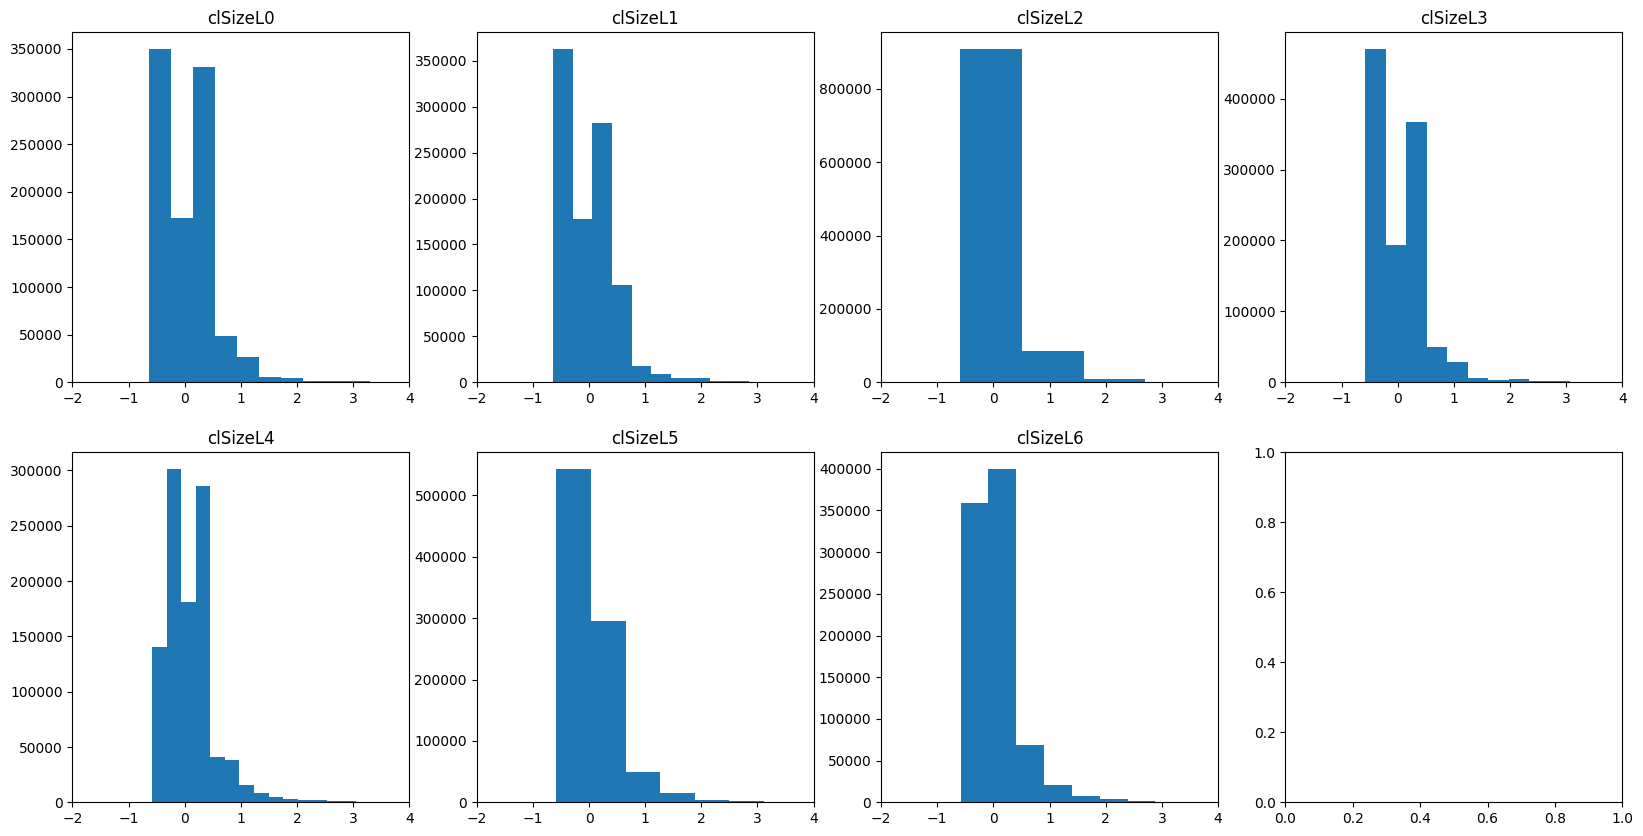

In [6]:
# plot the distribution of the features

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, feature in enumerate(features):
    axs[i//4, i%4].hist(dataset.normalized_dataset[feature], bins=100)
    axs[i//4, i%4].set_title(feature)
    axs[i//4, i%4].set_xlim(-2, 4)

plt.show()